<a href="https://colab.research.google.com/github/mojo46/Neural-Network/blob/master/Heart_disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Heart disease detection

In [1]:
#load heart disease data
import numpy

path_to_csv = '/content/heart.csv'

#load the data with the header skipped
heart_dataset = numpy.loadtxt(path_to_csv, delimiter=",",skiprows=1)

print(heart_dataset.shape)

X = heart_dataset[:,0:13]
Y = heart_dataset[:,13].reshape(-1,1)
print(X.shape,Y.shape)

# index =109
# print(heart_dataset[index],"\n\n",X[index],Y[index])

(303, 14)
(303, 13) (303, 1)


In [0]:
#test train split

from sklearn.model_selection import train_test_split

test_size=0.2

X, X_test, Y, Y_test = train_test_split(X, Y, test_size=test_size, random_state=42)
# Y= Y.reshape(-1.1)
# Y_test=Y_test.reshape(-1,1)

In [3]:
print(X.shape,X_test.shape,Y.shape,Y_test.shape)

(242, 13) (61, 13) (242, 1) (61, 1)


In [2]:
from keras.models import Sequential
from keras.layers import Dense

# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)


Using TensorFlow backend.


In [12]:
print(X.shape,Y.shape)

(303, 13) (303, 1)


In [11]:
# create model
model = Sequential()
model.add(Dense(26, input_dim=13, init='uniform', activation='relu'))
model.add(Dense(13, init='uniform', activation='relu'))
model.add(Dense(13, init='uniform', activation='relu'))
model.add(Dense(13, init='uniform', activation='relu'))
model.add(Dense(1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(26, input_dim=13, activation="relu", kernel_initializer="uniform")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(13, activation="relu", kernel_initializer="uniform")`
  """
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Dense` call to the Keras 2 API: `

In [12]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# Fit the model
history = model.fit(X, Y, nb_epoch=300, batch_size=100)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  This is separate from the ipykernel package so we can avoid doing imports until


Epoch 1/300
303/303 [==============================] - 0s 1ms/step - loss: 0.6931 - acc: 0.4620
Epoch 2/300
303/303 [==============================] - 0s 70us/step - loss: 0.6931 - acc: 0.5446
Epoch 3/300
303/303 [==============================] - 0s 62us/step - loss: 0.6930 - acc: 0.5446
Epoch 4/300
303/303 [==============================] - 0s 58us/step - loss: 0.6929 - acc: 0.5446
Epoch 5/300
303/303 [==============================] - 0s 68us/step - loss: 0.6927 - acc: 0.5446
Epoch 6/300
303/303 [==============================] - 0s 61us/step - loss: 0.6926 - acc: 0.5446
Epoch 7/300
303/303 [==============================] - 0s 64us/step - loss: 0.6924 - acc: 0.5446
Epoch 8/300
303/303 [==============================] - 0s 69us/step - loss: 0.6923 - acc: 0.5446
Epoch 9/300
303/303 [==============================] - 0s 64us/step - loss: 0.6921 - acc: 0.5446
Epoch 10/300
303/303 [==============================] - 0s 69us/step - loss: 0.6920 - acc: 0.5446
Epoch 11/300
303/303 [========

In [15]:
# evaluate the model
scores = model.evaluate(X, Y)
print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))

303/303 [==============================] - 0s 372us/step
acc: 82.51%


dict_keys(['loss', 'acc'])


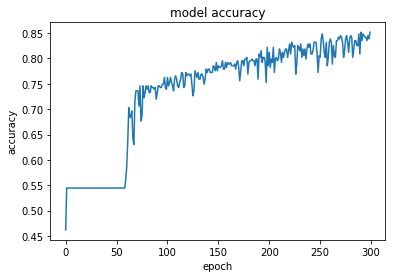

In [13]:

import matplotlib.pyplot as plt

# list all data in history
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.show()

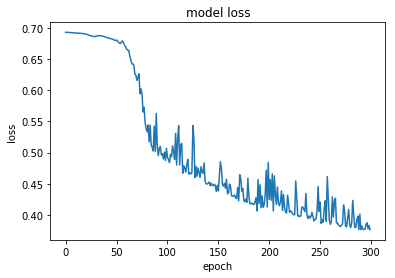

In [14]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.show()